In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('DiffInDiff.csv')
df.head()

,PHYS1015A,MidYear,Views
0,59,55.13,25.00
1,73,62.16,0.00
2,41,48.60,63.75
3,45,45.71,2.50
4,57,63.20,0.00


In [4]:
## Extract the rows that have zero videos - this is the control group
df_PHYS1015_control = []
df_MidYear_control = []
for i in df.index:
    if df.Views[i] == 0:
        df_PHYS1015_control.append(df.PHYS1015A[i])
        df_MidYear_control.append(df.MidYear[i])
df_PHYS1015_control = pd.Series(df_PHYS1015_control)
df_MidYear_control = pd.Series(df_MidYear_control)

df_control = pd.concat([df_PHYS1015_control,df_MidYear_control], axis = 1)
df_control.columns = ['Final Mark', 'MidYear Mark']

## extract the rows that have greater than zero videos -  this is the treatment group
## eventually, I will group these into bins to calculate the DIDs for bins.  But initially
## I am just going to extract all students that watched any videos

In [5]:
df_PHYS1015_treat = []
df_MidYear_treat = []
for i in df.index:
    if df.Views[i] > 0:
        df_PHYS1015_treat.append(df.PHYS1015A[i])
        df_MidYear_treat.append(df.MidYear[i])
df_PHYS1015_treat = pd.Series(df_PHYS1015_treat)
df_MidYear_treat = pd.Series(df_MidYear_treat)

df_treat = pd.concat([df_PHYS1015_treat,df_MidYear_treat], axis = 1)
df_treat.columns = ['Final Mark', 'MidYear Mark']


In [6]:
treat = []
for k in df_treat.index:
    treat.append(1)
    
df_treat['T/C'] = treat
df_treat


contr = []

for k in df_control.index:
    contr.append(0)
    
df_control['T/C'] = contr


In [132]:
## CONTROL GROUP: Here i place all the marks in one column.  The final mark is at the top, and the midyear is below.
# the length changes to 480.

df_control2 = df_control['Final Mark'].append(df_control['MidYear Mark']).reset_index(drop=True)
df_control2 = pd.DataFrame(df_control2)


In [170]:
## I need to create a second column indicating if it is treatment or control and place a zero in it.
# then i create a third column for Pre/Post and place a zero in it.  In the next cell I change the first
# 240 to 1
df_control2['T/C'] = 0
df_control2.shape
df_control2['Pre/Post'] = 0

In [171]:
# I need the first 240 to be a 1 and the second 240 to be zero.
for k in df_control.index:
    df_control2['Pre/Post'][k] =1

C:\Users\a0025105\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [172]:
## TREATMENT GROUP: Here i place all the marks in one column.  The final mark is at the top, and the midyear is below.
# the length changes to 1424, double the videos group.

df_treat2 = df_treat['Final Mark'].append(df_treat['MidYear Mark']).reset_index(drop=True)
df_treat2 = pd.DataFrame(df_treat2)
df_treat2.columns

In [173]:
## I need to create a second column indicating if it is treatment or control and place a zero in it.
# then i create a third column for Pre/Post and place a zero in it.  In the next cell I change the first
# 712 to 1
df_treat2['T/C'] = 1

df_treat2['Pre/Post'] = 0

In [175]:
# I need the first 240 to be a 1 and the second 240 to be zero.
for k in df_treat.index:
    df_treat2['Pre/Post'][k] = 1

C:\Users\a0025105\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [184]:
df_treat2.columns = ['Grade','T/C','Pre/Post']


,Grade,T/C,Pre/Post
0,59.00,1,1
1,41.00,1,1
2,45.00,1,1
3,67.00,1,1
4,76.00,1,1
5,62.00,1,1
6,53.00,1,1
7,52.00,1,1
8,53.00,1,1
9,52.00,1,1


In [208]:
DID_all = df_control2.append(df_treat2).reset_index(drop=True)
DID_all.head()

,Grade,T/C,Pre/Post
0,73.0,0,1
1,57.0,0,1
2,53.0,0,1
3,67.0,0,1
4,71.0,0,1


In [210]:
DID_all['TT'] = 0

for k in DID_all.index:
    DID_all['TT'][k] = DID_all['T/C'][k]*DID_all['Pre/Post'][k]

C:\Users\a0025105\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [219]:
from scipy import stats
import numpy as np
X = np.array(DID_all.iloc[:,1:])
y = np.array(DID_all.iloc[:,0])

reg = LinearRegression().fit(X,y)

In [222]:
print('The coefficients are :{}' .format(reg.coef_))
print('The intercept is {}'. format(reg.intercept_))
reg.score

The coefficients are :[-1.49114298 -2.01110833  3.68641451]
The intercept is 60.390274999999995


<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

In [313]:
df.shape

(952, 3)

# Here I create a new master dataset

In [7]:
## Need to start over and get a better master dataframe
DID_master = pd.DataFrame(df['PHYS1015A'].append(df['MidYear']).reset_index(drop=True))
 
DID_master['Views']= df['Views']


In [8]:
# Duplicate views at the bottom half
for k in df.index:
    DID_master['Views'][k+952] =df.Views[k]
    


In [9]:
DID_master.columns =['Grade','Views']


In [10]:
DID_master['Pre/Post'] = 0
for k in df.index:
    DID_master['Pre/Post'][k] = 1

C:\Users\a0025105\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Below is the final master set: DID_master

In [11]:
DID_master['T/C'] = 0
for k in DID_master.index:
    if DID_master['Views'][k] == 0:
        DID_master['T/C'][k] =  0
    else:
        DID_master['T/C'][k] = 1

C:\Users\a0025105\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\a0025105\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


# I still need to create the final column where we multiply the PrePost with TC.


In [12]:
DID_master['TT'] = 0

for b in DID_master.index:
    DID_master['TT'][b] = DID_master['Pre/Post'][b]*DID_master['T/C'][b]

C:\Users\a0025105\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [13]:
DID10 = DID_master.loc[DID_master.Views <=10]
DID20 = DID_master.loc[(DID_master.Views >10) &(DID_master.Views <=20)|(DID_master.Views == 0)]
DID30 = DID_master.loc[(DID_master.Views >20) &(DID_master.Views <=30) |(DID_master.Views == 0)]
DID40 = DID_master.loc[(DID_master.Views >30) &(DID_master.Views <=40) |(DID_master.Views == 0)]
DID50 = DID_master.loc[(DID_master.Views >40)& (DID_master.Views <=50) |(DID_master.Views == 0)]
DID60 = DID_master.loc[(DID_master.Views >50)& (DID_master.Views <=60) |(DID_master.Views ==0)]
DID70 = DID_master.loc[(DID_master.Views >60)& (DID_master.Views <=70) |(DID_master.Views ==0)]
DID80 = DID_master.loc[(DID_master.Views >70)& (DID_master.Views <=80) |(DID_master.Views ==0)]
DID90 = DID_master.loc[(DID_master.Views >80)& (DID_master.Views <=90) |(DID_master.Views ==0)]
DID100 = DID_master.loc[(DID_master.Views >90)& (DID_master.Views <=100) |(DID_master.Views ==0)]


DID_list = [DID10, DID20, DID30, DID40,DID50,DID60,DID70,DID80,DID90, DID100]

In [14]:
DID_5 = DID_master.loc[DID_master.Views <=5]
DID_10 = DID_master.loc[(DID_master.Views >5) &(DID_master.Views <=10)|(DID_master.Views == 0)]
DID_15 = DID_master.loc[(DID_master.Views >10) &(DID_master.Views <=15) |(DID_master.Views == 0)]
DID_20 = DID_master.loc[(DID_master.Views >15) &(DID_master.Views <=20) |(DID_master.Views == 0)]
DID_25 = DID_master.loc[(DID_master.Views >20)& (DID_master.Views <=25) |(DID_master.Views == 0)]
DID_30 = DID_master.loc[(DID_master.Views >25)& (DID_master.Views <=30) |(DID_master.Views ==0)]
DID_35 = DID_master.loc[(DID_master.Views >30)& (DID_master.Views <=35) |(DID_master.Views ==0)]
DID_40 = DID_master.loc[(DID_master.Views >35)& (DID_master.Views <=40) |(DID_master.Views ==0)]
DID_45 = DID_master.loc[(DID_master.Views >40)& (DID_master.Views <=45) |(DID_master.Views ==0)]
DID_50 = DID_master.loc[(DID_master.Views >45)& (DID_master.Views <=50) |(DID_master.Views ==0)]
DID_55 = DID_master.loc[(DID_master.Views >50)& (DID_master.Views <=55) |(DID_master.Views ==0)]
DID_60 = DID_master.loc[(DID_master.Views >55)& (DID_master.Views <=60) |(DID_master.Views ==0)]
DID_65 = DID_master.loc[(DID_master.Views >60)& (DID_master.Views <=65) |(DID_master.Views ==0)]
DID_70 = DID_master.loc[(DID_master.Views >65)& (DID_master.Views <=70) |(DID_master.Views ==0)]
DID_75 = DID_master.loc[(DID_master.Views >70)& (DID_master.Views <=75) |(DID_master.Views ==0)]
DID_80 = DID_master.loc[(DID_master.Views >75)& (DID_master.Views <=80) |(DID_master.Views ==0)]
DID_85 = DID_master.loc[(DID_master.Views >80)& (DID_master.Views <=85) |(DID_master.Views ==0)]
DID_90 = DID_master.loc[(DID_master.Views >85)& (DID_master.Views <=90) |(DID_master.Views ==0)]
DID_95 = DID_master.loc[(DID_master.Views >90)& (DID_master.Views <=95) |(DID_master.Views ==0)]
DID_100 = DID_master.loc[(DID_master.Views >95)& (DID_master.Views <=100) |(DID_master.Views ==0)]






DID_list2 = [DID_5, DID_10,DID_15,DID_20,DID_25,DID_30,DID_35,DID_40,DID_45,DID_50,
            DID_55,DID_60,DID_65,DID_70,DID_75,DID_80,DID_85,DID_90,DID_95,DID_100]

In [515]:
len(DID_master)

1904

In [15]:
from scipy import stats
import numpy as np

DID_coef = []
DID_lengths = []

for ind in DID_list2:
    X = np.array(ind.iloc[:,2:])
    y = np.array(ind.iloc[:,0])
    reg = LinearRegression().fit(X,y)
    #print('The coefficients are :{}' .format(reg.coef_))
    #print('The intercept is {}'. format(reg.intercept_))
    DID_coef.append(reg.coef_[2])
    DID_lengths.append(len(ind))

A                0
count  10.000000
mean    3.825753
std     0.902757
min     2.354081
25%     3.144136
50%     3.954004
75%     4.295844
max     5.257873
B                0
count  10.000000
mean    3.544046
std     1.192519
min     2.113608
25%     2.506108
50%     3.444976
75%     4.063296
max     5.709932


 Below I am trying to calculate the number of students in each bin.
 First I calculate how many control students there were.
 It calculates 480, but that is double the correct amount

In [511]:
DID_master.loc[DID_master.Views ==0].shape

(480, 5)

Then I need to take each of the DIDs calculated above, subtract the control students and then divide by two again.

In [16]:
DID_lengths = np.array(DID_lengths)
#These are the number of students watching videos in each bin
(DID_lengths-480)/2

array([77., 62., 46., 48., 38., 45., 35., 30., 37., 34., 39., 30., 28.,
       23., 32., 17., 18., 15., 26., 32.])

In [494]:
DID_master.loc[DID_master.Views ==0].shape

(480, 5)

In [529]:
DID = DID_master.loc[(DID_master.Views >75)|(DID_master.Views ==0)]
X = np.array(DID.iloc[:,2:])
y = np.array(DID.iloc[:,0])
reg = LinearRegression().fit(X,y)
print('The coefficients are :{}' .format(reg.coef_))
print('The intercept is {}'. format(reg.intercept_))

The coefficients are :[-2.01110833  0.20166944  3.86360833]
The intercept is 60.390274999999995


In [437]:
X = np.array(DID505.iloc[:,1:])
y = np.array(DID505.iloc[:,0])
reg = LinearRegression().fit(X,y)
print('The coefficients are :{}' .format(reg.coef_))
print('The intercept is {}'. format(reg.intercept_))

The coefficients are :[ 0.04201901 -0.129352   -1.98296638]
The intercept is 59.44939683333334


Below I want to plot the amount of videos watched and the did values

In [51]:
DID_coef

,0
0,2.858901
1,3.001431
2,4.737195
3,4.232233
4,4.307793
5,4.259997
6,3.572251
7,3.675775
8,2.354081
9,5.257873


A                0
count  10.000000
mean    3.825753
std     0.902757
min     2.354081
25%     3.144136
50%     3.954004
75%     4.295844
max     5.257873
B                0
count  10.000000
mean    3.544046
std     1.192519
min     2.113608
25%     2.506108
50%     3.444976
75%     4.063296
max     5.709932


<IPython.core.display.Javascript object>


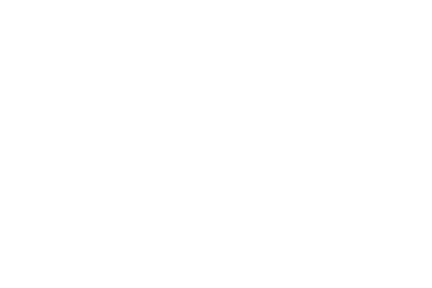

Text(0,0.5,'DID value [%]')

<IPython.core.display.Javascript object>


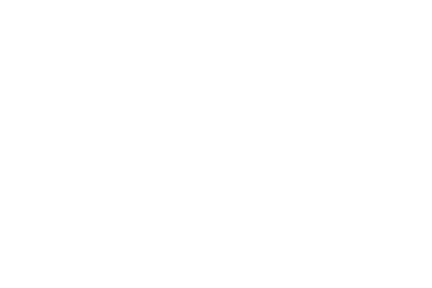

In [80]:
%matplotlib notebook
plt.plot(DID_coef, 'ro')
plt.xlabel('Bins of videos watched')
plt.ylabel('DID value [%]')

In [81]:
DID_coefa = DID_coef.iloc[0:10]
DID_coefb = DID_coef.iloc[10:]
print('A {}' .format(DID_coefa.describe()))
print('B {}' .format(DID_coefb.describe()))

A                0
count  10.000000
mean    3.825753
std     0.902757
min     2.354081
25%     3.144136
50%     3.954004
75%     4.295844
max     5.257873
B                0
count  10.000000
mean    3.544046
std     1.192519
min     2.113608
25%     2.506108
50%     3.444976
75%     4.063296
max     5.709932


In [71]:
XX = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]).reshape(-1,1)
XXa = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1,1)
yy = np.array(DID_coef)
yya  =np.array(DID_coefa)
reg2 = LinearRegression().fit(XX,yy)
print('The coefficients are :{}' .format(reg2.coef_))
print('The intercept is {}'. format(reg2.intercept_))

The coefficients are :[[-0.01241877]]
The intercept is [3.81529659]


Text(0,0.5,'DID value [%]')

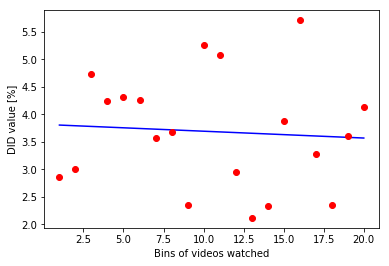

In [78]:
%matplotlib inline
plt.plot(XX,reg2.coef_*XX +reg2.intercept_,'b-')
plt.plot(XX, yy, 'ro')
plt.xlabel('Bins of videos watched')
plt.ylabel('DID value [%]')